In [7]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [8]:
#1. 데이터 적재

In [9]:
print("iris_dataset의 키 : \n", iris_dataset.keys()) 
#딕셔너리 형태, 키 안에 값들이 쭉 있을 것
#data와 target 키 사용 

iris_dataset의 키 : 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [12]:
#데이터에 대한 설명
print(iris_dataset['DESCR'] [:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [13]:
print("타깃의 이름 : ", iris_dataset['target_names'])

타깃의 이름 :  ['setosa' 'versicolor' 'virginica']


In [14]:
print("특성의 이름 : \n", iris_dataset['feature_names'])

특성의 이름 : 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [15]:
print("data의 타입 : ", type(iris_dataset['data']))

data의 타입 :  <class 'numpy.ndarray'>


In [18]:
print("data의 크기 : ", iris_dataset['data'].shape)
#데이터 150개, feature 4개 (열 : feature, 행 : sample)

data의 크기 :  (150, 4)


In [17]:
print("data의 처음 다섯 행 : \n", iris_dataset['data'][:5])

data의 처음 다섯 행 : 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [19]:
print("target의 타입 : ", type(iris_dataset['target']))

target의 타입 :  <class 'numpy.ndarray'>


In [21]:
print("target의 크기 : ", iris_dataset['target'].shape)
#1차원 ndarray

target의 크기 :  (150,)


In [23]:
print("타깃 : \n", iris_dataset['target'])
#샘플들이 50개씩 클래스 분류 되어있음
#실제 계산은 string 형태가 아니라 숫자 형태

타깃 : 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [24]:
#2. 성과 측정 : 훈련데이터와 테스트 데이터

#학습에 사용되지 않은 데이터를 사용함

In [28]:
from sklearn.model_selection import train_test_split 

#계속 나옴!!(train과 test를 자동으로 나누는 작업)
#train : test = 0.75 : 0.25

X_train, X_test, y_train, y_test = train_test_split(#피쳐, 타겟, 시드
    iris_dataset['data'], iris_dataset['target'],
    random_state = 0
     #실행할 때마다 같은 값이 나와야 함  : random값에 시드를 줌(고정)
)

In [30]:
print("X_train 크기 : ", X_train.shape)
print("y_train 크기 : ", y_train.shape)

X_train 크기 :  (112, 4)
y_train 크기 :  (112,)


In [31]:
print("X_test 크기 : ", X_test.shape)
print("y_test 크기 : ", y_test.shape)

X_test 크기 :  (38, 4)
y_test 크기 :  (38,)


In [32]:
#3. 가장 먼저 할 일 : 데이터 살펴보기

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

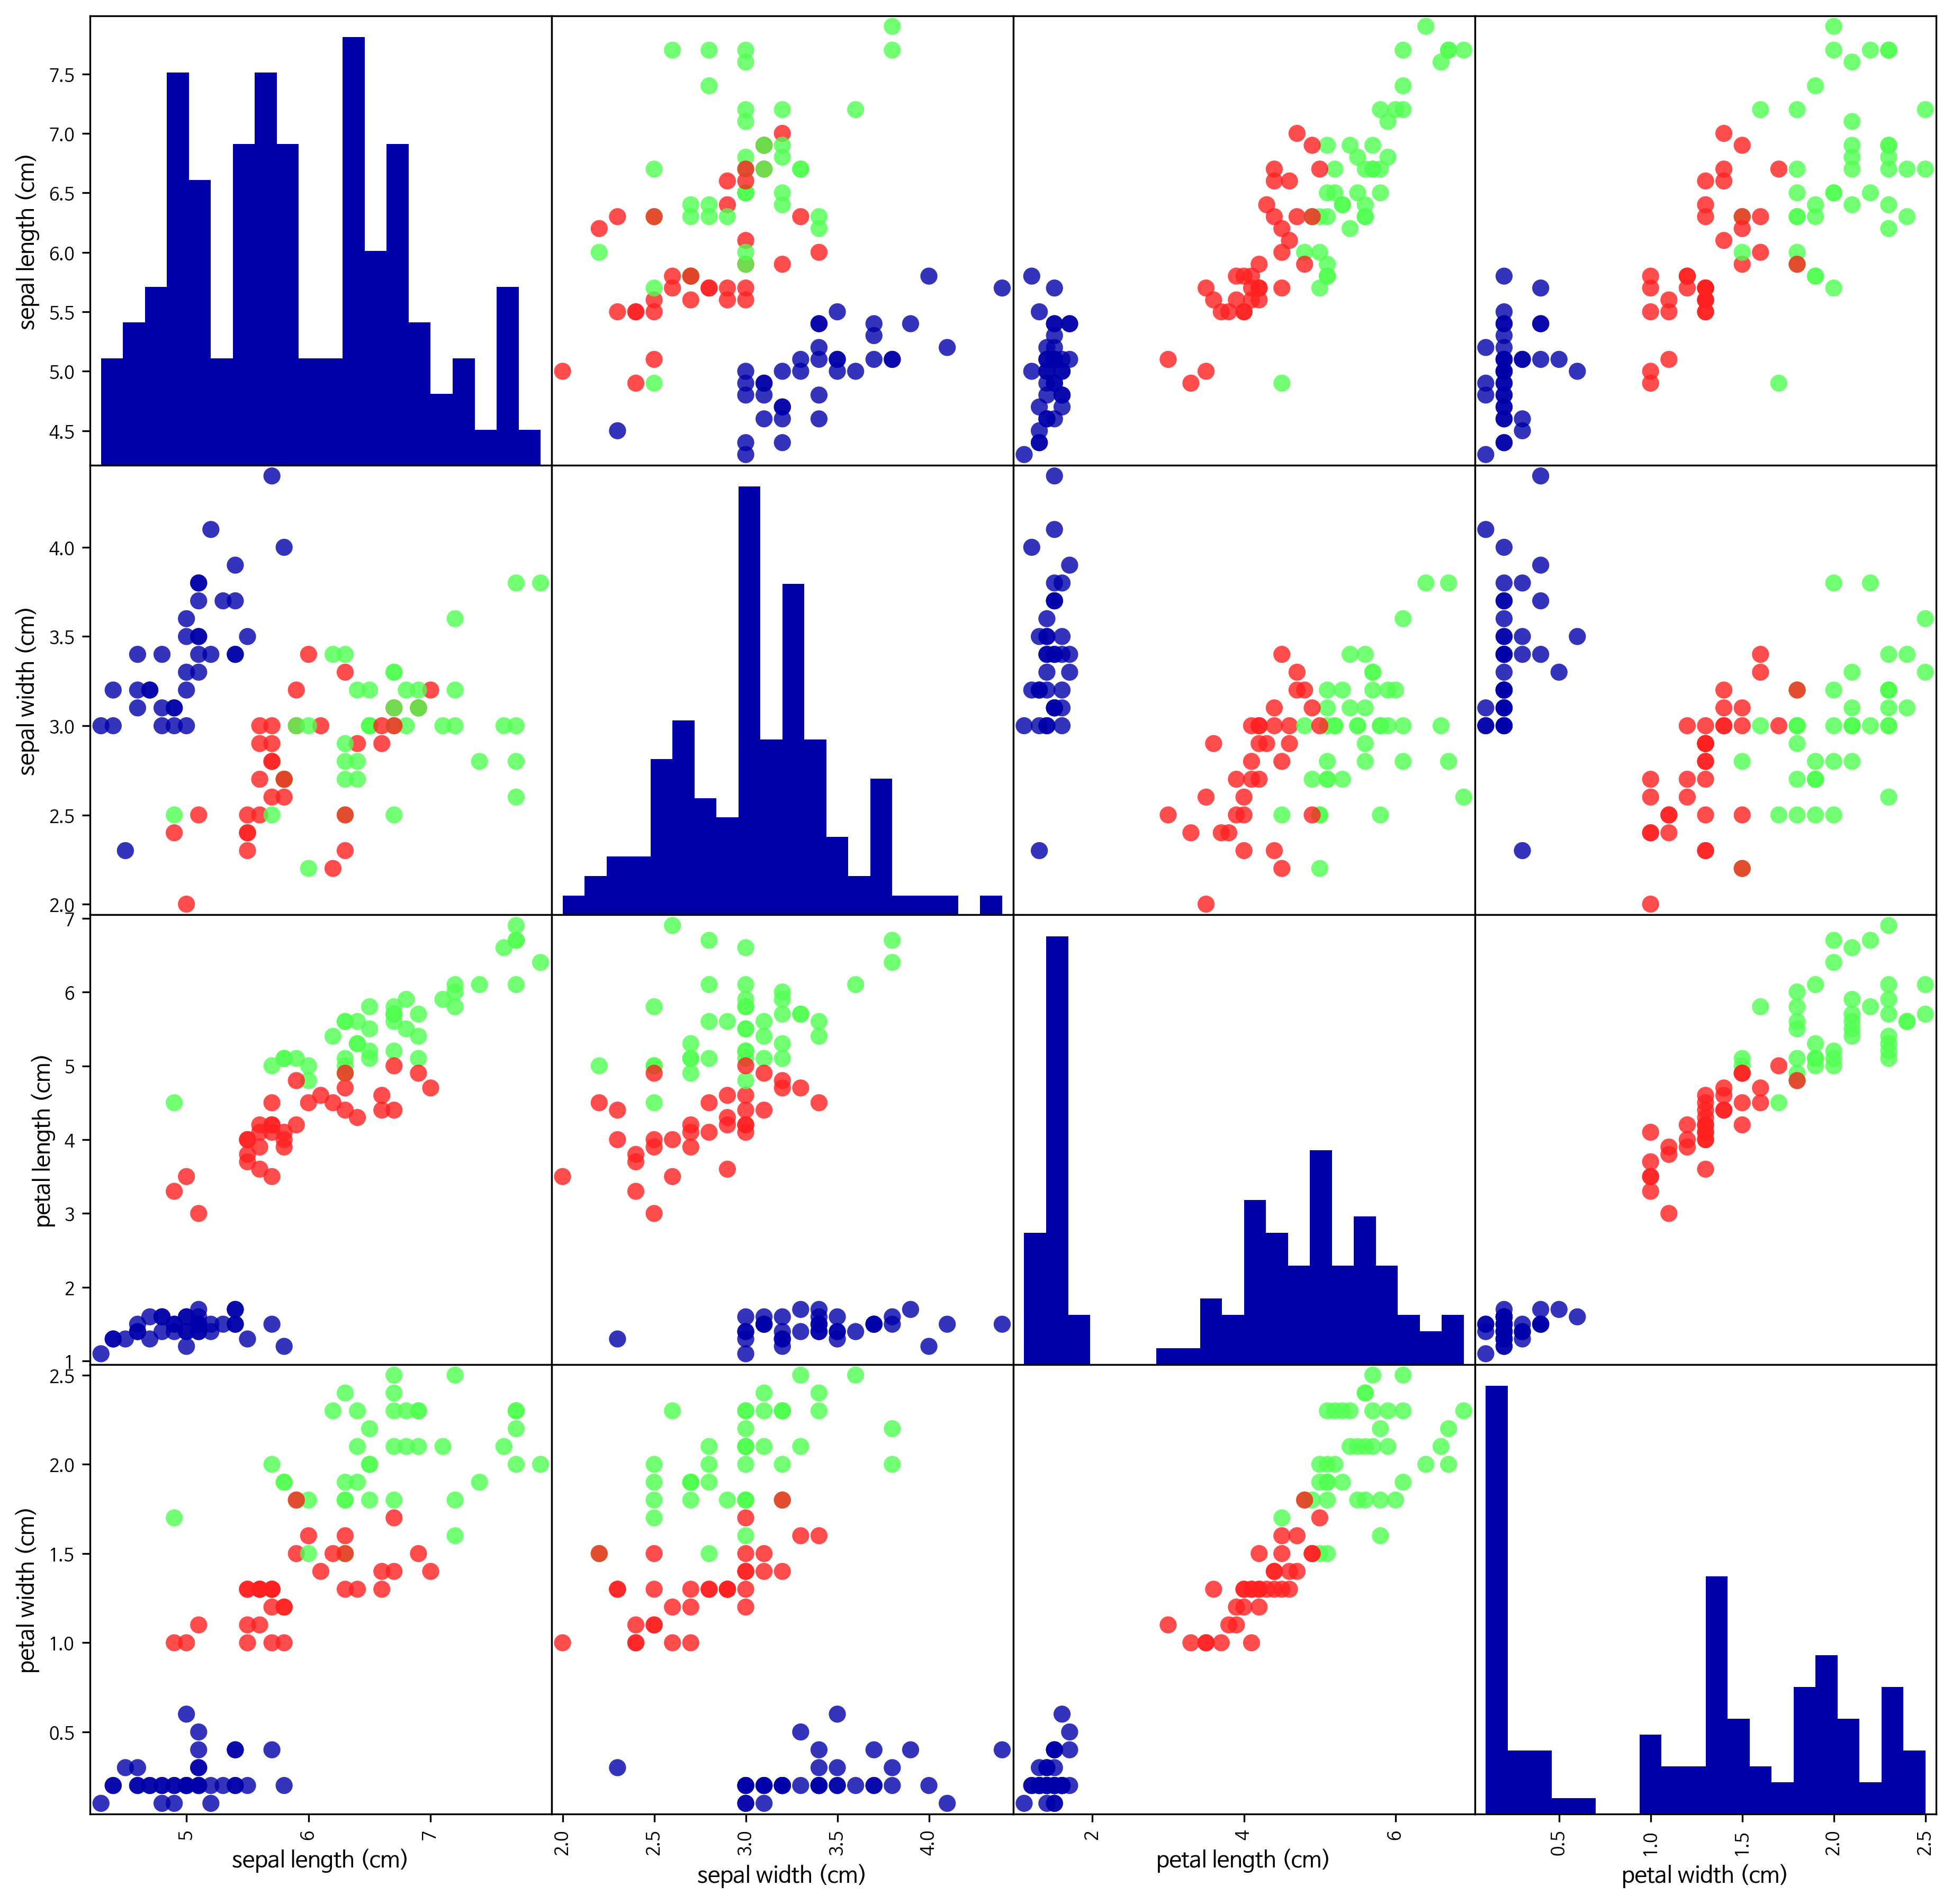

In [41]:
import pandas as pd
from preamble import * #mg패키지 소스코드 폴더에 같이 넣어야 함

iris_dataframe = pd.DataFrame(X_train, columns = iris_dataset.feature_names)

pd.plotting.scatter_matrix(iris_dataframe, c = y_train, figsize = (15,15), marker = 'o',
                          hist_kwds = {'bins':20}, s=60, alpha = .8, cmap=mglearn.cm3)

In [ ]:
#4. 첫 번째 머신러닝 모델 : K-최근접 이웃 알고리즘 

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn =  KNeighborsClassifier(n_neighbors = 1) #k = 1 가장 가까운 한 개의 데이터만 봄

In [42]:
knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=1)

In [43]:
#5.예측 및 모델 평가하기

In [44]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape")

X_new.shape


In [46]:
prediction = knn.predict(X_new)
print("예측 : ", prediction)
print("예측한 타깃의 이름 : ", iris_dataset['target_names'][prediction])

예측 :  [0]
예측한 타깃의 이름 :  ['setosa']


In [47]:
y_pred = knn.predict(X_test)
print("테스트 세트에 대한 예측값 : \n", y_pred)

테스트 세트에 대한 예측값 : 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [48]:
print("테스트 세트의 정확도 : {:.2f}".format(np.mean(y_pred == y_test)))

테스트 세트의 정확도 : 0.97


In [49]:
print("테스트 세트의 정확도 : {:.2f}".format(knn.score(X_test, y_test))) 
#test값만 넣어도 됨 

테스트 세트의 정확도 : 0.97


In [50]:
#6. 요약

In [ ]:
#pdf 참고